In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from src.config import load_config
import numpy as np
from pypfopt import expected_returns,EfficientFrontier,risk_models
from pypfopt.discrete_allocation import DiscreteAllocation,get_latest_prices
from src.financial_models.VaR import Var

class EfficientDiversification:
    def __init__(self,config):
        self.config = config


        
    def fetch_data(self) -> pd.DataFrame:
        """Loads in data from yfinance using config.yaml"""
        try:
            all_prices = yf.download(tickers=self.config['combined_assets'],start=self.config['start_date'],end=self.config['end_date'])['Close']
            all_prices = all_prices.dropna()
            all_prices.drop_duplicates(inplace=True)
            return all_prices
        except Exception as e:
            raise e 
        
    
    def get_portfolio_returns(self) -> pd.DataFrame:
        """ returns from portfolio from yfinance download """
        try:
            # load in all prices
            all_prices = self.fetch_data()
            returns = all_prices.pct_change().dropna()
            return returns
        except Exception as e:
            raise e
        

    
    
    def portfolio_metrics(self):
        """
        args:
            (mu) -> Expected Returns (using pyportfolio)
            (S) -> Risk(Volatility);
            (Ef) -> Efficient Frontier;
        """

        #all prices
        all_prices = self.fetch_data()

        mu = expected_returns.mean_historical_return(all_prices)
        S = risk_models.sample_cov(all_prices)
        ef = EfficientFrontier(mu,S)
            

        weights = ef.max_sharpe()
        weights = ef.clean_weights()


            
        expected_annual_return, annual_volatility, sharpe_ratio = ef.portfolio_performance(verbose=True)
        performance = {
            "Expected Annual Return":expected_annual_return,
            "Annual Volatility":annual_volatility,
            "Sharpe Ratio":sharpe_ratio
        }
        return performance,expected_annual_return,annual_volatility,sharpe_ratio,weights



if __name__ == "__main__":
    config = load_config()
    ef_obj = EfficientDiversification(config)
    ef_obj.fetch_data()
    ef_obj.get_portfolio_returns()
    ef_obj.portfolio_metrics()


/tmp/ipykernel_105764/1697880600.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  all_prices = yf.download(tickers=self.config['combined_assets'],start=self.config['start_date'],end=self.config['end_date'])['Close']
[*********************100%***********************]  31 of 31 completed
/tmp/ipykernel_105764/1697880600.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  all_prices = yf.download(tickers=self.config['combined_assets'],start=self.config['start_date'],end=self.config['end_date'])['Close']
[*********************100%***********************]  31 of 31 completed
/tmp/ipykernel_105764/1697880600.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  all_prices = yf.download(tickers=self.config['combined_assets'],start=self.config['start_date'],end=self.config['end_date'])['Close']
[*********************100%***********************]  31 of 31 completed


Expected annual return: 12.9%
Annual volatility: 6.6%
Sharpe Ratio: 1.94


In [20]:
data = ef_obj.fetch_data()
data

/tmp/ipykernel_105764/1697880600.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  all_prices = yf.download(tickers=self.config['combined_assets'],start=self.config['start_date'],end=self.config['end_date'])['Close']
[*********************100%***********************]  31 of 31 completed


Ticker,AAPL,ARKK,BNB-USD,BTC-USD,DIA,EFA,ETH-USD,F,GM,GOOGL,...,TSLA,USDC-USD,USDT-USD,VOO,VTI,WMT,XLF,XLK,XRP-USD,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-23,127.606918,130.657455,31.097898,23241.345703,276.833862,63.043705,583.714600,6.900062,41.038883,85.819595,...,215.326660,0.999939,0.999426,315.325226,179.902649,44.694588,26.608961,123.487892,0.258602,3690.010010
2020-12-24,128.591095,128.788986,32.500591,23735.949219,277.513550,63.069855,611.607178,6.800283,40.197800,86.114059,...,220.589996,1.000074,0.999931,316.585358,180.203583,44.781963,26.645775,124.306610,0.337819,3703.060059
2020-12-28,133.190201,125.661957,35.844559,27084.808594,279.333038,63.584103,730.397339,6.823311,40.275146,88.090424,...,221.229996,1.000101,0.998603,319.338989,181.343735,45.318726,26.774624,125.712814,0.247958,3735.360107
2020-12-29,131.416779,122.282272,38.952831,27362.437500,278.836914,63.993767,731.520142,6.769583,40.188133,87.285980,...,221.996674,0.999978,0.998590,318.666901,180.586761,45.031624,26.682589,125.115639,0.220962,3727.040039
2020-12-30,130.296249,125.016708,38.136299,28840.953125,279.452545,64.080933,751.618958,6.800283,40.449162,86.217842,...,231.593338,1.000011,1.000275,319.096344,181.072739,44.994171,26.802244,125.048225,0.211828,3732.040039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-24,252.309998,83.459999,1018.847839,113328.632812,461.019989,92.580002,4153.469238,11.630000,59.919998,247.139999,...,442.790009,0.999694,1.000264,607.761902,325.983826,102.730003,53.610001,278.489990,2.928035,6637.970215
2025-09-25,256.869995,81.629997,945.713623,109049.289062,459.429993,91.919998,3868.333984,11.620000,60.590000,245.789993,...,423.390015,1.000016,1.000471,604.860229,324.238678,103.050003,53.470001,278.000000,2.742319,6604.720215
2025-09-26,255.460007,83.099998,960.923950,109712.828125,462.279999,92.629997,4035.887939,12.010000,61.240002,246.539993,...,440.399994,0.999748,1.000478,608.419983,326.273010,103.160004,53.860001,278.839996,2.785812,6643.700195


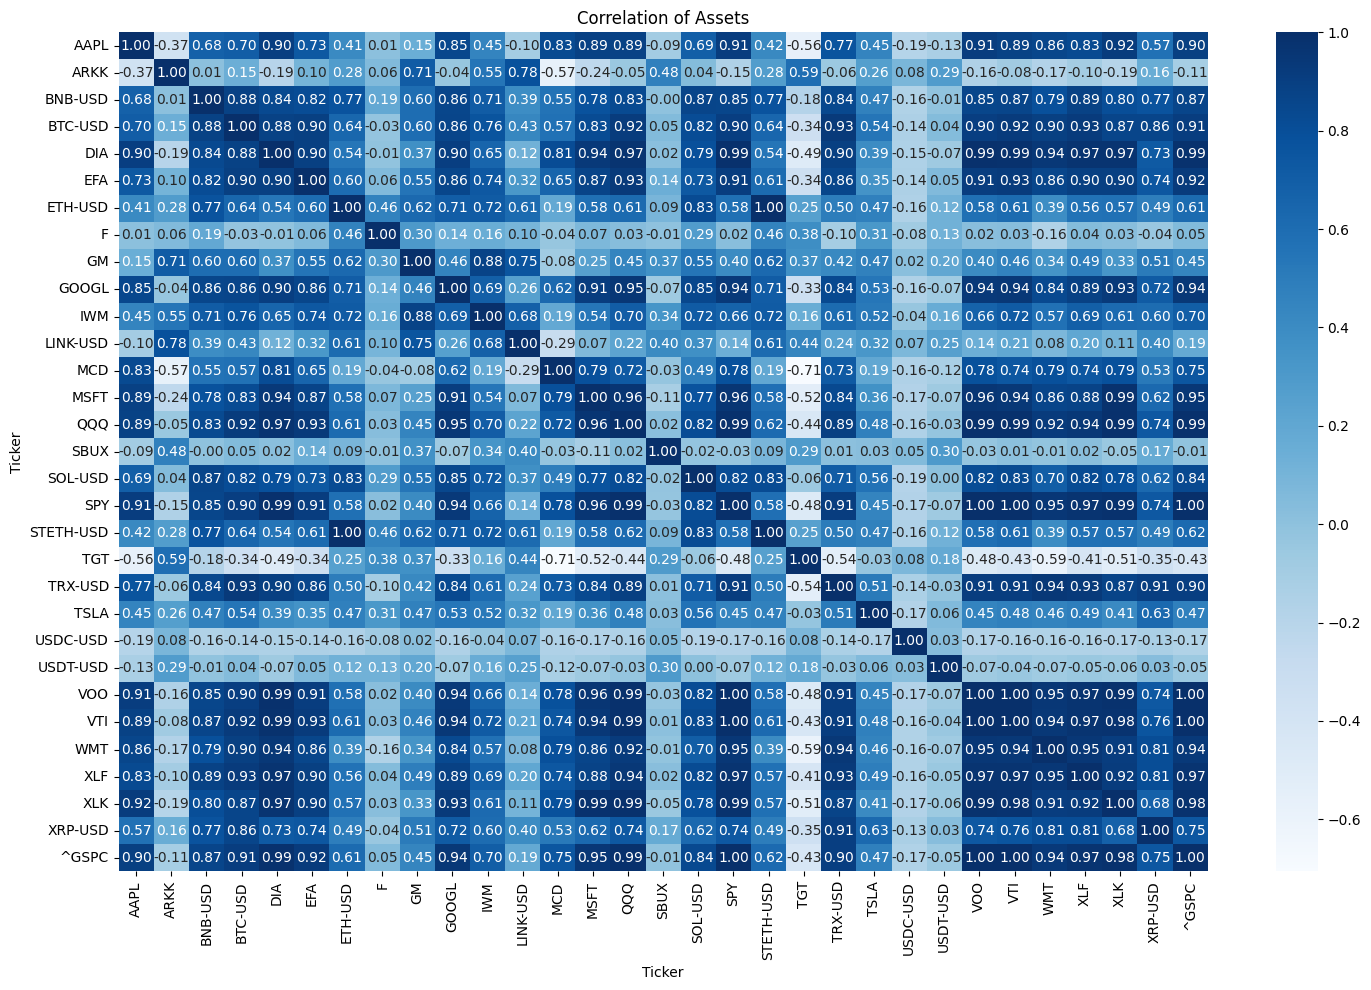

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),fmt=".2f",annot=True,cmap="Blues")
plt.title("Correlation of Assets")
plt.tight_layout()
plt.savefig("images/ef_assets_heatmap.png")
plt.show()

In [22]:
optimal_portfolio = ef_obj.portfolio_metrics()
optimal_portfolio

/tmp/ipykernel_105764/1697880600.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  all_prices = yf.download(tickers=self.config['combined_assets'],start=self.config['start_date'],end=self.config['end_date'])['Close']
[*********************100%***********************]  31 of 31 completed


Expected annual return: 12.9%
Annual volatility: 6.6%
Sharpe Ratio: 1.94


({'Expected Annual Return': np.float64(0.12895704838545163),
  'Annual Volatility': np.float64(0.06636338943010954),
  'Sharpe Ratio': np.float64(1.9431956307967433)},
 np.float64(0.12895704838545163),
 np.float64(0.06636338943010954),
 np.float64(1.9431956307967433),
 OrderedDict([('AAPL', 0.0),
              ('ARKK', 0.0),
              ('BNB-USD', 0.02105),
              ('BTC-USD', 0.0),
              ('DIA', 0.0),
              ('EFA', 0.0),
              ('ETH-USD', 0.0),
              ('F', 0.0),
              ('GM', 0.0),
              ('GOOGL', 0.01627),
              ('IWM', 0.0),
              ('LINK-USD', 0.0),
              ('MCD', 0.04289),
              ('MSFT', 0.00224),
              ('QQQ', 0.0),
              ('SBUX', 0.0),
              ('SOL-USD', 0.03761),
              ('SPY', 0.0),
              ('STETH-USD', 0.0),
              ('TGT', 0.0),
              ('TRX-USD', 0.00123),
              ('TSLA', 0.0),
              ('USDC-USD', 0.75857),
              ('USD